In [1]:
import pyomo.environ as pyo

model = pyo.ConcreteModel()
model.x = pyo.Var(domain=pyo.NonNegativeReals)

model.profit = pyo.Objective(
    expr = 40*model.x,
    sense = pyo.maximize
)
model.demand = pyo.Constraint(expr = model.x <= 40)
model.laborA = pyo.Constraint(expr = model.x <= 80)
model.laborB = pyo.Constraint(expr = 2*model.x <= 100)

solver = pyo.SolverFactory('cbc')
results = solver.solve(model)
print(results)


Problem: 
- Name: unknown
  Lower bound: 1600.0
  Upper bound: 1600.0
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 1
  Number of nonzeros: 0
  Sense: maximize
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.0
  Wallclock time: 0.01
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: None
      Number of created subproblems: None
    Black box: 
      Number of iterations: 0
  Error rc: 0
  Time: 0.1949329376220703
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [2]:
print(model.profit.display())

profit : Size=1, Index=None, Active=True
    Key  : Active : Value
    None :   True : 1600.0
None


In [3]:
print(model.x.display())

x : Size=1, Index=None
    Key  : Lower : Value : Upper : Fixed : Stale : Domain
    None :     0 :  40.0 :  None : False : False : NonNegativeReals
None


In [5]:
print(f'Profit: {model.profit()} per week')
print(f'X = {model.x()} per week')

Profit: 1600.0 per week
X = 40.0 per week


In [22]:
# When demand is increased to 50 Units per week
model = pyo.ConcreteModel()
model.x = pyo.Var(domain=pyo.NonNegativeReals)

model.profit = pyo.Objective(
    expr = 40*model.x,
    sense = pyo.maximize
)
model.demand = pyo.Constraint(expr = model.x <= 50)
model.laborA = pyo.Constraint(expr = model.x <= 80)
model.laborB = pyo.Constraint(expr = 2*model.x <= 100)

solver = pyo.SolverFactory('cbc')
results = solver.solve(model)
print(f'Profit: {model.profit()} per week')
print(f'X = {model.x()} per week')

Profit: 2000.0 per week
X = 50.0 per week


In [25]:
# Question 2
model = pyo.ConcreteModel()
model.y = pyo.Var(domain=pyo.NonNegativeReals)
model.profit = pyo.Objective(
    expr = 30*model.y,
    sense = pyo.maximize
)
model.laborA = pyo.Constraint(expr = model.y <= 80)
model.laborB = pyo.Constraint(expr = model.y <= 100)
solver = pyo.SolverFactory('cbc')
results = solver.solve(model)
print(f'Profit: {model.profit()} per week')
print(f'X = {model.y()} per week')

Profit: 2400.0 per week
X = 80.0 per week


In [26]:
# How about Manufacturing both product A and product B
model = pyo.ConcreteModel()
model.x = pyo.Var(domain=pyo.NonNegativeReals)
model.y = pyo.Var(domain=pyo.NonNegativeReals)

model.profit = pyo.Objective(
    expr = 40*model.x + 30*model.y,
    sense = pyo.maximize
)
model.demand = pyo.Constraint(expr = model.x <= 40)
model.laborA = pyo.Constraint(expr = model.x + model.y <= 80)
model.laborB = pyo.Constraint(expr = 2*model.x + model.y <= 100)
solver = pyo.SolverFactory('cbc')
results = solver.solve(model)
print(f'Total Profit = {model.profit()} per week')
print(f'Product X = {model.x()} per week')
print(f'Product Y = {model.y()} per week')

Total Profit = 2600.0 per week
Product X = 20.0 per week
Product Y = 60.0 per week


## The mixed strategy earns more profit than both Items produced independently

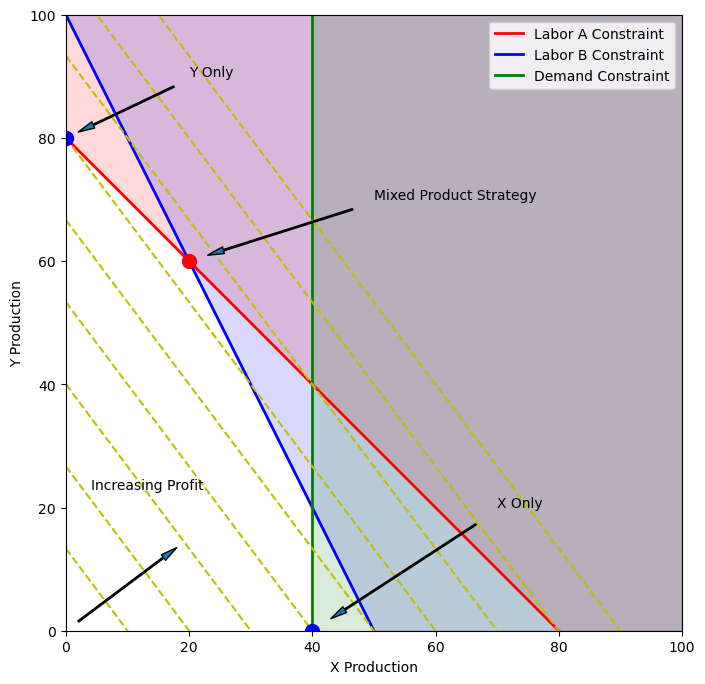

In [41]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(10,8))
ax.set_aspect('equal')
ax.axis([0, 100, 0, 100])
ax.set_xlabel('X Production')
ax.set_ylabel('Y Production')

# Labor A Constraint
x = np.array([0, 80])
ax.plot(x, 80 -x, 'r', lw=2)

# Labor B Constraint
x = np.array([0, 50])
ax.plot(x, 100 - 2*x, 'b', lw=2)

# demand Constraint
ax.plot([40, 40], [0, 100], 'g', lw=2)
ax.legend(['Labor A Constraint', 'Labor B Constraint', 'Demand Constraint'])
ax.fill_between([0, 80, 100], [80, 0, 0 ], [100, 100, 100], color='r', alpha=0.15)
ax.fill_between([0, 50, 100], [100, 0, 0], [100, 100, 100], color='b', alpha=0.15)
ax.fill_between([40, 100], [0, 0], [100, 100], color='g', alpha=0.15)

# Contours of constant profit
x = np.array([0, 100])
for p in np.linspace(0, 3600, 10):
    y = (p - 40*x)/30
    ax.plot(x, y, 'y--')

arrowprops = dict(shrink=.1, width=1, headwidth=5)
ax.plot(20, 60, 'r.', ms=20)
ax.annotate('Mixed Product Strategy', xy=(20, 60), xytext=(50, 70), arrowprops=arrowprops)

ax.plot(0, 80, 'b.', ms=20)
ax.annotate('Y Only', xy=(0, 80), xytext=(20, 90), arrowprops=arrowprops)

ax.plot(40, 0, 'b.', ms=20)
ax.annotate('X Only', xy=(40, 0), xytext=(70, 20), arrowprops=arrowprops)

ax.text(4, 23, 'Increasing Profit')
ax.annotate('', xy=(20, 15), xytext=(0,0), arrowprops=arrowprops)

plt.show()